Calculate view factors
==================

In this section, we will learn how to:

- calculate the view factor matrix from a PV array object and understand its shape
- plot the pvarray with indices to visualize the meaning of the matrix

Note: the following calculation steps are already implemented in the simulation engine ``PVEngine``, please refer to the next tutorials for running complete simulations.

Imports and settings

In [1]:
# Import external libraries
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Settings
%matplotlib inline
np.set_printoptions(precision=3)

### Prepare PV array parameters

In [2]:
pvarray_parameters = {
    'n_pvrows': 2,            # number of pv rows
    'pvrow_height': 1,        # height of pvrows (measured at center / torque tube)
    'pvrow_width': 1,         # width of pvrows
    'axis_azimuth': 0.,       # azimuth angle of rotation axis
    'surface_tilt': 20.,      # tilt of the pv rows
    'surface_azimuth': 90.,   # azimuth of the pv rows front surface
    'solar_zenith': 40.,      # solar zenith angle
    'solar_azimuth': 150.,    # solar azimuth angle
    'gcr': 0.5,               # ground coverage ratio
}

### Create a PV array and required attributes

Import the ``OrderedPVArray`` class and create a PV array object using the parameters above

In [3]:
from pvfactors.geometry import OrderedPVArray

pvarray = OrderedPVArray.fit_from_dict_of_scalars(pvarray_parameters)

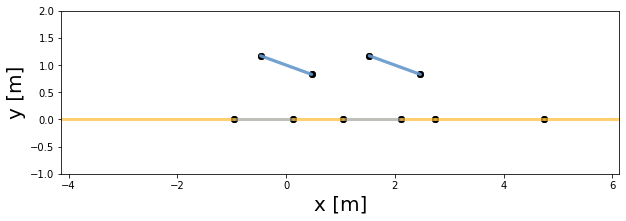

In [4]:
# Plot pvarray shapely geometries at timestep 0
f, ax = plt.subplots(figsize=(10, 3))
pvarray.plot_at_idx(0, ax)
plt.show()

As discussed in the "PV Array geometry introduction" tutorial, the ground also has "cut points" to indicate the limits of what the PV row front and back sides can see.

### Calculating the view factor matrix

In order to calculate the view factor matrix, we need to pass the PV array object to view factor calculator method.

Create the view factor calculator.

In [5]:
# import view factor calculator
from pvfactors.viewfactors import VFCalculator
# instantiate calculator
vf_calculator = VFCalculator()

In [6]:
# calculate view factor matrix of the pv array
vf_matrix = vf_calculator.build_ts_vf_matrix(pvarray)

**Important remarks:**

- the view factor matrix has shape ``[n_ts_surfaces + 1, n_ts_surfaces + 1, n_timestamps]``, where ``n_ts_surfaces`` is the number of timeseries surfaces in the PV array, and ``n_timestamps`` is the number of timestamps
- the first 2 dimensions have value ``n_ts_surfaces`` **+ 1** because the view factors to the sky are also calculated, so the sky is considered like another surface in the mathematical problem

In [7]:
print("Number of dimensions: {}".format(vf_matrix.ndim))
print("Shape of vf matrix: {}".format(vf_matrix.shape))

Number of dimensions: 3
Shape of vf matrix: (24, 24, 1)


Here is a function to help make sense of this

In [8]:
def select_view_factor(i, j, vf_matrix):
    "Function to print the view factors"
    n = vf_matrix.shape[0] - 1
    vf = vf_matrix[i, j, :]
    # print the view factor
    i = i if i < n else 'sky'
    j = j if j < n else 'sky'
    print('View factor from surface {} to surface {}: {}'.format(i, j, np.around(vf, decimals=2)))

Let's print some of the view factor values, and check their meaning on a PV array plot with surface indices

In [9]:
# View factors from back of leftmost pv row
select_view_factor(17, 0, vf_matrix)
select_view_factor(17, 3, vf_matrix)
select_view_factor(17, 13, vf_matrix)
# View factors from back of rightmost pv row
select_view_factor(21, 3, vf_matrix)
# View factors from front of leftmost pv row
select_view_factor(15, 23, vf_matrix)
# View factors from front of rightmost pv row
select_view_factor(19, 23, vf_matrix)

View factor from surface 17 to surface 0: [0.4]
View factor from surface 17 to surface 3: [0.05]
View factor from surface 17 to surface 13: [0.]
View factor from surface 21 to surface 3: [0.4]
View factor from surface 15 to surface sky: [0.94]
View factor from surface 19 to surface sky: [0.97]


Let's plot the PV array with the surface indices to understand visually what these numbers mean:

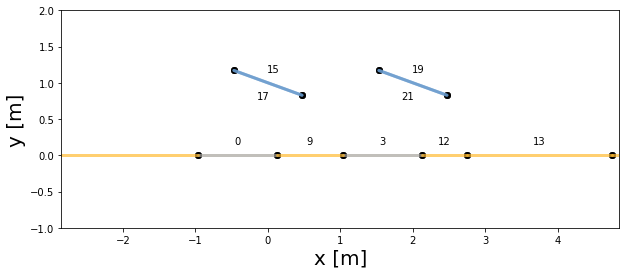

In [10]:
# Plot pvarray shapely geometries
f, ax = plt.subplots(figsize=(10, 4))
pvarray.plot_at_idx(0, ax, with_surface_index=True)
plt.show()